In [19]:
import numpy as np
import numpy.linalg as la

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

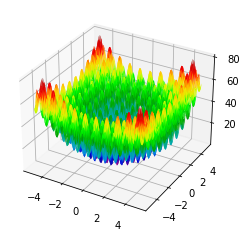

In [20]:
X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y) 

# Функция Растригина, где n = 2
Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20 
 
fig = plt.figure() 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)    
# plt.savefig('rastrigin_graph.png')
plt.show()

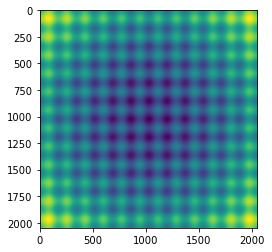

iter 0, z= -8.96, x= [-0.79 -1.68]


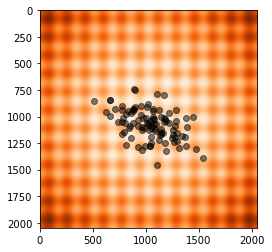

iter 1, z= -7.03, x= [0.4  0.04]


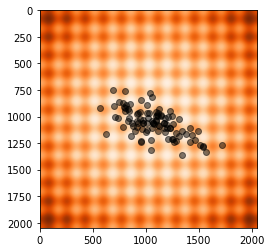

iter 2, z= -9.30, x= [1.17 0.79]


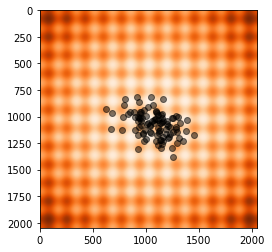

iter 3, z= -6.00, x= [ 0.14 -0.53]


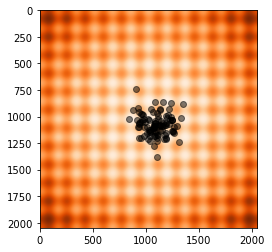

iter 4, z= -9.80, x= [-0.08  1.48]


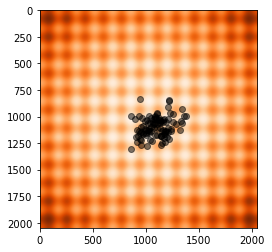

iter 5, z= -8.43, x= [-1.25  0.4 ]


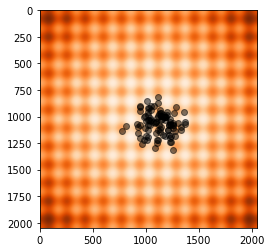

iter 6, z= -9.37, x= [1.09 0.33]


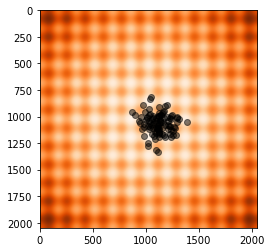

iter 7, z= -8.06, x= [1.14 0.32]


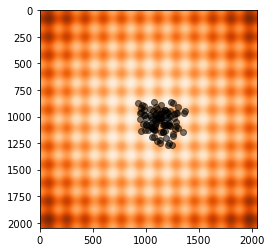

iter 8, z= -7.94, x= [1.03 0.28]


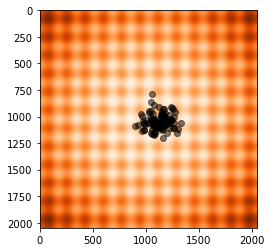

iter 9, z= -7.79, x= [1.42 0.22]


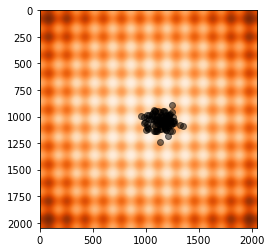

iter 10, z= -9.93, x= [ 0.95 -0.14]


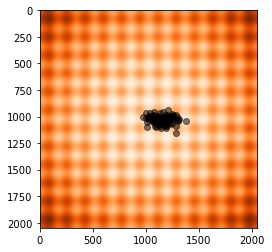

iter 11, z= -9.18, x= [0.7 0.1]


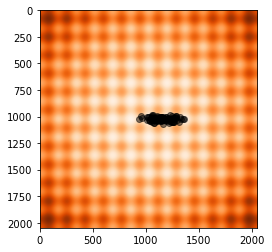

iter 12, z= -9.82, x= [1.03 0.05]


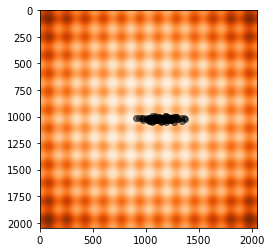

iter 13, z= -9.92, x= [ 1.03 -0.07]


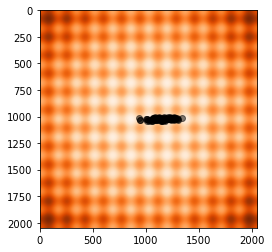

iter 14, z= -9.72, x= [ 0.42 -0.01]


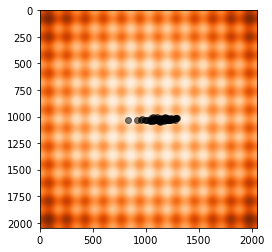

iter 15, z= -8.95, x= [0.98 0.  ]


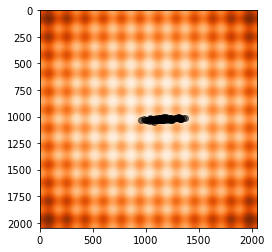

iter 16, z= -9.79, x= [ 1.47 -0.06]


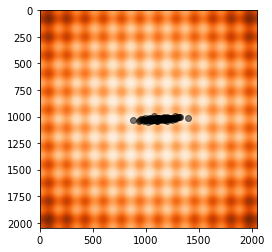

iter 17, z= -9.97, x= [ 0.48 -0.04]


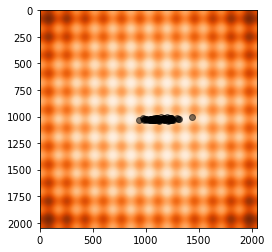

iter 18, z= -8.90, x= [ 1.3  -0.02]


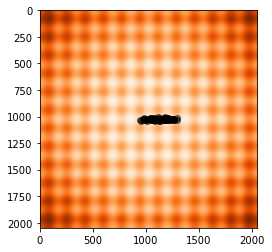

iter 19, z= -9.91, x= [0.24 0.1 ]


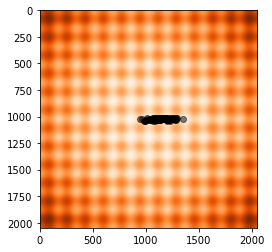

iter 20, z= -9.97, x= [ 0.38 -0.01]


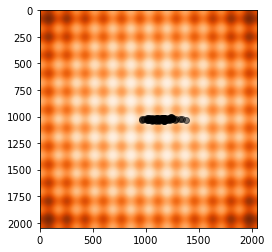

iter 21, z= -10.00, x= [ 0.36 -0.03]


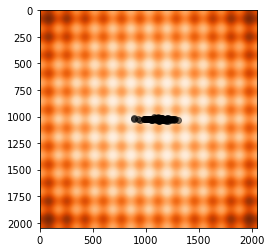

iter 22, z= -9.97, x= [ 1.46 -0.04]


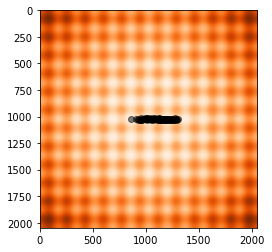

iter 23, z= -9.99, x= [-0.08 -0.04]


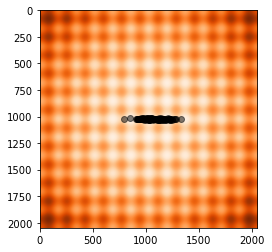

iter 24, z= -9.91, x= [-0.85 -0.06]


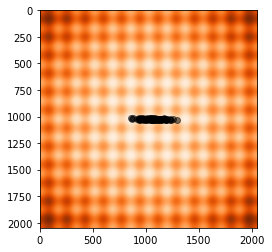

iter 25, z= -9.97, x= [ 0.79 -0.03]


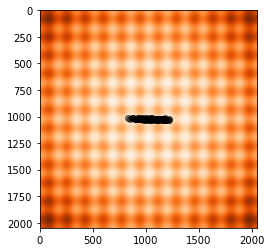

iter 26, z= -9.99, x= [0.2 0. ]


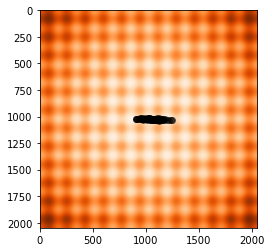

iter 27, z= -9.95, x= [-0.08 -0.  ]


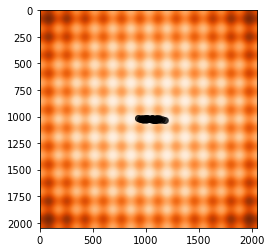

iter 28, z= -9.97, x= [-0.   -0.01]


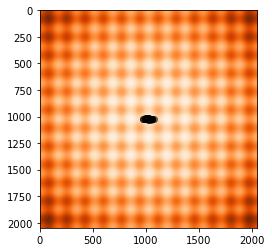

iter 29, z= -10.00, x= [ 0.01 -0.01]


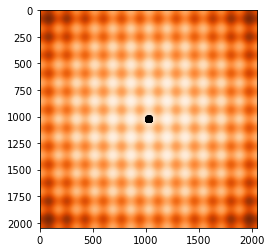

iter 30, z= -10.00, x= [-0.01 -0.  ]


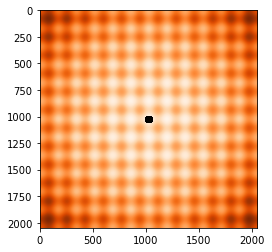

<Figure size 432x288 with 0 Axes>

In [22]:
np.random.seed(0)
def rastrigin(X, A=10):
    return A + np.sum((X**2 - A * np.cos(2 * np.pi * X)), -1)


def _plot_points(X, low=-10, high=10, size=1024):
    """ Plots the points on same scale as image """
    tmp = (X - low)/(high-low) * size
    plt.scatter(tmp[:,0], tmp[:,1], color='black', alpha=.5)
    

if __name__ == '__main__':

    low, high, size = -6, 6, 2048
    spacing = np.linspace(low, high, size)    

    grid = np.stack(np.meshgrid(spacing, spacing), -1)
    function = lambda X: rastrigin(X)   # Move the min away from (0,0)
    Z = function(grid)
    plt.imshow(Z);
    plt.show();

     
    n = 100     # Population size
    d = 2       # Dimensions
    k = 25      # Size of elite population

    X = np.random.normal(0,1.24, (d, n))

    for i in range(31):
        # Minimize this function
        fitness = function(X.T)
        arg_topk = np.argsort(fitness)[:k]
        topk = X[:,arg_topk]

        #print(f'Iter {i}, score {fitness[arg_topk[0]]}, X = {X[:,arg_topk[0]]}')
        # Covariance of topk but using mean of entire population
        centered = topk - X.mean(1, keepdims=True)
        C = (centered @ centered.T)/(k-1)
        # Eigenvalue decomposition
        w, E = la.eigh(C)
        # Generate new population
        # Sample from multivariate gaussian with mean of topk
        N = np.random.normal(size=(d,n))
        X = topk.mean(1,keepdims=True) + (E @ np.diag(np.sqrt(w)) @ N)
        if i % 1 == 0:
            print(f'iter {i}, z= {fitness[arg_topk[0]]:.2f}, x= {X[:, arg_topk[0]].round(2)}')
            plt.clf()
            plt.imshow(Z, cmap='Oranges')
            _plot_points(X.T, low, high, size)
            plt.pause(.2)
            plt.draw()